# Praca inżynierska

> Autor: Mateusz Woźniak


Projekt to model uczenia maszynowego, który rozpoznaje typ komórki na podstawie zdjęcia rozmazu szpiku kostnego.

Zbiór danych: https://www.kaggle.com/datasets/andrewmvd/bone-marrow-cell-classification/


In [24]:
import os
import matplotlib.pyplot as plt
import latextable
import texttable

names = {
    'ABE': 'Nieprawidłowy eozynofil',
    'ART': 'Artefakt',
    'BAS': 'Bazofil',
    'BLA': 'Blast',
    'EBO': 'Erytroblast',
    'EOS': 'Eozynofil',
    'FGC': 'Fagocyt',
    'HAC': 'Włochata komórka',
    'KSC': 'Cienie komórkowe',
    'LYI': 'Niedojrzały limfocyt',
    'LYT': 'Limfocyt',
    'MMZ': 'Metamielocyt',
    'MON': 'Monocyte',
    'MYB': 'Mielocyt',
    'NGB': 'Krwinka biała pałeczkowata',
    'NGS': 'Segmentowany neutrofil',
    'NIF': 'Brak rozpoznania',
    'OTH': 'Inna komórka',
    'PEB': 'Proerytroblast',
    'PLM': 'Komórka plazmatyczna',
    'PMO': 'Promielocyt',
}
    

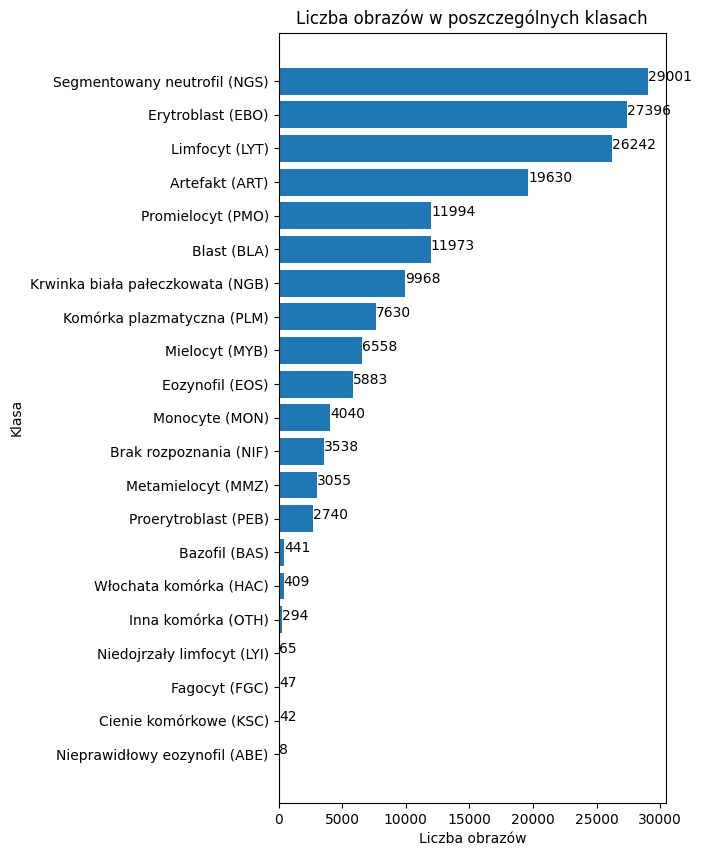

\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|}
			\hline
			Klasa & Nazwa & Liczba obrazów \\
			\hline
			NGS & Segmentowany neutrofil & 29001 \\
			\hline
			EBO & Erytroblast & 27396 \\
			\hline
			LYT & Limfocyt & 26242 \\
			\hline
			ART & Artefakt & 19630 \\
			\hline
			PMO & Promielocyt & 11994 \\
			\hline
			BLA & Blast & 11973 \\
			\hline
			NGB & Krwinka biała pałeczkowata & 9968 \\
			\hline
			PLM & Komórka plazmatyczna & 7630 \\
			\hline
			MYB & Mielocyt & 6558 \\
			\hline
			EOS & Eozynofil & 5883 \\
			\hline
			MON & Monocyte & 4040 \\
			\hline
			NIF & Brak rozpoznania & 3538 \\
			\hline
			MMZ & Metamielocyt & 3055 \\
			\hline
			PEB & Proerytroblast & 2740 \\
			\hline
			BAS & Bazofil & 441 \\
			\hline
			HAC & Włochata komórka & 409 \\
			\hline
			OTH & Inna komórka & 294 \\
			\hline
			LYI & Niedojrzały limfocyt & 65 \\
			\hline
			FGC & Fagocyt & 47 \\
			\hline
			KSC & Cienie komórkowe & 42 \\
			\hline
			ABE & Nieprawidłowy eozynofil 

In [25]:
def count_images():
    cwd = os.getcwd()
    dataset_dir = os.path.join(cwd, "dataset")
    subdirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
    counts = {}
    for subdir in subdirs:
        subdir_path = os.path.join(dataset_dir, subdir)
        counts[subdir] = sum([len(files) for r, d, files in os.walk(subdir_path)])
        
    return counts

rows = []

def plot_counts(counts):
    key_names = list(map(lambda x: names[x] + ' (' + x + ')', counts.keys()))
    plt.figure(figsize=(5, 10))
    plt.barh(key_names, counts.values())
    for i in range(len(counts)):
        plt.text(list(counts.values())[i], i, str(list(counts.values())[i]))
    plt.title("Liczba obrazów w poszczególnych klasach")
    plt.xlabel("Liczba obrazów")
    plt.ylabel("Klasa")
    plt.savefig("images_count.png", bbox_inches="tight")
    plt.show()

counts = count_images()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
plot_counts(counts)

rows.append(["Klasa", "Nazwa", "Liczba obrazów"])

for key, value in reversed(counts.items()):
    rows.append([key, names[key], value])

table = texttable.Texttable()
table.add_rows(rows)
print(latextable.draw_latex(table, caption="Klasy obrazów w zbiorze danych", label="tab:images_count"))

UnidentifiedImageError: cannot identify image file 'dataset/PLM/.DS_Store'

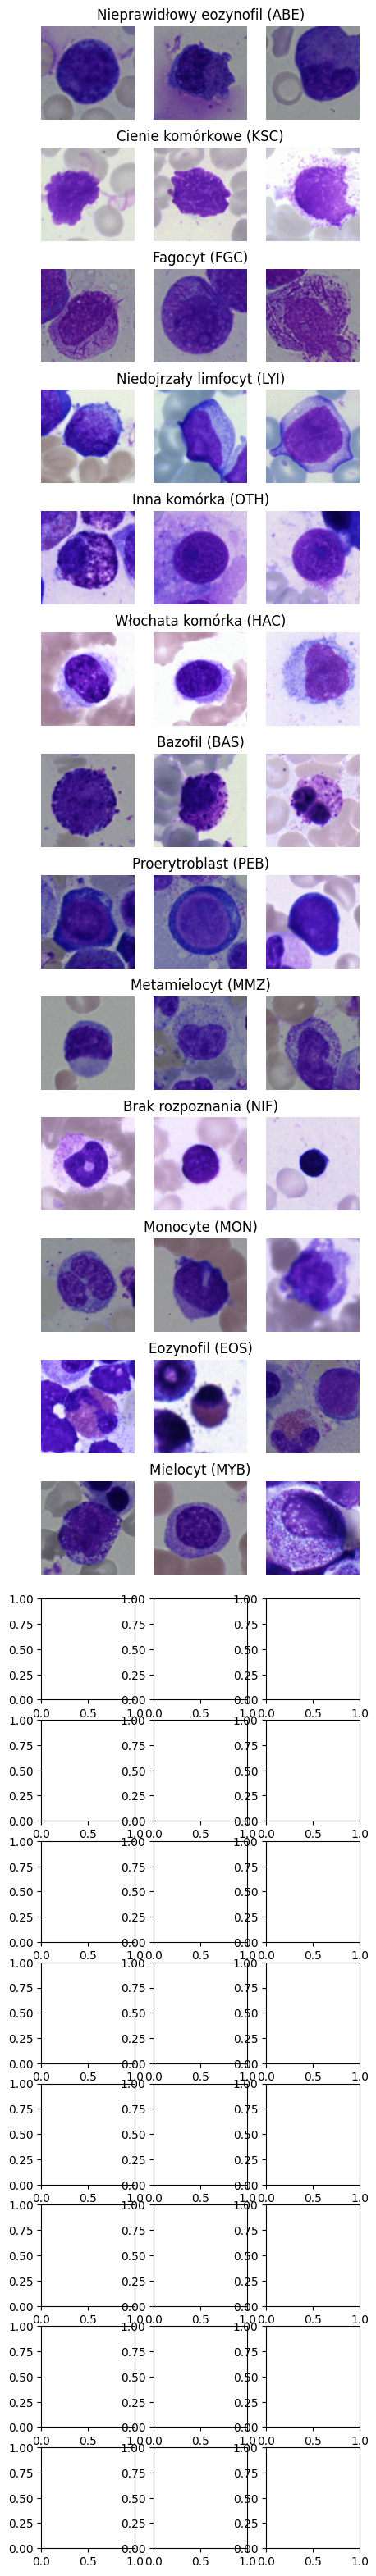

In [27]:
fig, ax = plt.subplots(len(counts), 3, figsize=(5, 40))
for key in counts:
    filenames = []
    for r, d, files in os.walk(os.path.join("dataset", key)):
        for file in files:
            filenames.append(os.path.join(r, file))
    for i in range(3):
        I = plt.imread(filenames[i])
        ax[list(counts.keys()).index(key), i].imshow(I)
        ax[list(counts.keys()).index(key), i].axis('off')
        if i == 0:
            ax[list(counts.keys()).index(key), i+1].set_title(names[key] + f' ({key})')
plt.savefig("images_examples.png", bbox_inches="tight")